# Copy of Linux Notebook switching to Windows
## Contents of this notebook
- importing data
- combining data in some ways
- descriptive analytics
- simple maschine learning methods
    - using sklearn
    - tree
    - rfo
    - log-reg
    - dummy
- Deep learning methods
    - using pytorch
- performance evaluation
    - accuracy
    - balanced accuracy
    - sensitivity
    - specifity
    - AUROC
    - AUPRC

# Imports

In [1]:
import pandas as pd
from os.path import exists
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import dummy
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import torch
import gc

# Reading in Data and working it
- Paths are hardcoded 

In [2]:
id_path_driamsa2015 = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\id_driamsa\\2015\\'
id_path_driamsa2016 = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\id_driamsa\\2016\\'
id_path_driamsa2017 = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\id_driamsa\\2017\\'
id_path_driamsa2018 = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\id_driamsa\\2018\\'
id_path_driamsb = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\id_driamsb\\2018\\'
id_path_driamsc = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\id_driamsc\\2018\\'
id_path_driamsd = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\id_driamsd\\2018\\'
id_file_name_2018 = '2018_clean.csv'
id_file_name_driamsa15 = '2015_clean.csv'
id_file_name_driamsa16 = '2016_clean.csv'
id_file_name_driamsa17 = '2017_clean.csv'

# define all the dataframes
driamsb_id_df= pd.read_csv(f"{id_path_driamsb}{id_file_name_2018}",dtype = 'str')
driamsc_id_df = pd.read_csv(f"{id_path_driamsc}{id_file_name_2018}",dtype = 'str')
driamsd_id_df = pd.read_csv(f"{id_path_driamsd}{id_file_name_2018}",dtype = 'str')
driamsa15_id_df = pd.read_csv(f"{id_path_driamsa2015}{id_file_name_driamsa15}",dtype = 'str')
driamsa16_id_df = pd.read_csv(f"{id_path_driamsa2016}{id_file_name_driamsa16}",dtype = 'str')
driamsa17_id_df = pd.read_csv(f"{id_path_driamsa2017}{id_file_name_driamsa17}",dtype = 'str')
driamsa18_id_df = pd.read_csv(f"{id_path_driamsa2018}{id_file_name_2018}",dtype = 'str')

In [3]:
#Driams B
folder = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\binned_driamsb\\2018\\'
driams_codes = driamsb_id_df['code'] 

mass_spectra=[]

for i in range(driams_codes.size):
    path_to_file = f"{folder}{driams_codes[i]}.txt"
    file_exists = exists(path_to_file)
    if file_exists:
        to_add_df = pd.read_csv(path_to_file,sep=' ', dtype={"binned_intensity": "float64"})
        to_add_df = to_add_df.rename(columns={"binned_intensity": driams_codes[i]})
        to_add_df = to_add_df[driams_codes[i]]
        mass_spectra.append(to_add_df)

        
intensity_driamsb_df = pd.concat(mass_spectra,axis=1)

intensity_driamsb_df

,ca568529-351a-43af-8cec-7175488f66ea,0fd4fd1a-8233-400d-bdee-f0c13819dc6b,b1fa5e1c-d013-4716-b4b0-6552ad1c50de,00aa2ddb-1819-475c-85e6-ed39d6efe6bc,1756cdc5-d0cd-43a9-be29-c2d28eb82013,fc7c3e5d-6338-4bbe-885b-07889f3bd38c,c81323a2-fabb-428b-a002-1cc7c5b5c0ad,c67bbc96-a758-4368-ba52-6110bd0c9af5,d10f09d8-ed43-4637-a5ea-a417710ec229,386b81b3-ab01-48d0-8791-81a8a438a39c,...,e8db43df-a34d-40fa-a354-a28748e2c5f5,753d577a-d8a0-4929-acaf-39dd8c214196,02cf7dfe-c0c0-46e4-8848-168ddb20a336,80cb2c77-a65a-4ad9-ad6e-f0c076fcd839,9578d221-014d-4e20-a643-e5d12b3ea5ef,758228ee-3cc8-49d6-bc42-9e086c9a4c5a,c0d9e83c-de2b-45d6-b225-30549a2ecadc,fbbb0e92-577e-4cdd-a8ae-05367a477403,68d1147b-1606-46e3-a515-e992f0f84455,57043b13-3ba8-4f30-83ac-2416c23cec3a
0,0.000247,0.000138,0.000354,0.000026,0.000100,0.000398,0.000372,0.000537,0.000765,0.000361,...,0.000500,0.000242,0.000427,0.000267,0.000142,0.000291,0.000350,0.000147,0.000139,0.000270
1,0.000372,0.000259,0.000728,0.000470,0.000480,0.000230,0.000047,0.000100,0.000817,0.000232,...,0.001969,0.000995,0.000975,0.000552,0.001462,0.000175,0.000534,0.000332,0.001038,0.000640
2,0.000535,0.000318,0.000725,0.001454,0.000925,0.001555,0.000302,0.000929,0.000934,0.000121,...,0.002127,0.000804,0.000956,0.001172,0.001675,0.000512,0.000170,0.000434,0.001870,0.001133
3,0.000352,0.000146,0.000555,0.000778,0.000666,0.001267,0.000236,0.001040,0.000954,0.000253,...,0.001280,0.000982,0.004683,0.003624,0.001154,0.000366,0.000137,0.000419,0.001177,0.000722
4,0.000241,0.000021,0.000213,0.000546,0.001015,0.001183,0.000545,0.001215,0.000621,0.000511,...,0.000684,0.000907,0.004626,0.002561,0.001496,0.000180,0.000553,0.000585,0.001480,0.001141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000018,0.000003,0.000061,0.000032,0.000067,0.000050,0.000020,0.000032,0.000031,0.000057,...,0.000058,0.000004,0.000123,0.000091,0.000052,0.000045,0.000025,0.000002,0.000044,0.000018
5996,0.000014,0.000012,0.000047,0.000038,0.000079,0.000040,0.000020,0.000040,0.000026,0.000044,...,0.000035,0.000022,0.000044,0.000131,0.000055,0.000030,0.000026,0.000014,0.000048,0.000003
5997,0.000047,0.000018,0.000048,0.000053,0.000084,0.000021,0.000028,0.000037,0.000010,0.000023,...,0.000019,0.000038,0.000019,0.000051,0.000063,0.000032,0.000018,0.000053,0.000054,0.000016
5998,0.000058,0.000020,0.000045,0.000034,0.000099,0.000034,0.000048,0.000027,0.000010,0.000018,...,0.000003,0.000079,0.000026,0.000032,0.000060,0.000048,0.000024,0.000038,0.000033,0.000018


In [4]:
#driamsC
folder = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\binned_driamsc\\2018\\'
driams_codes = driamsc_id_df['code'] 

mass_spectra=[]

for i in range(driams_codes.size):
    path_to_file = f"{folder}{driams_codes[i]}.txt"
    file_exists = exists(path_to_file)
    if file_exists:
        to_add_df = pd.read_csv(path_to_file,sep=' ', dtype={"binned_intensity": "float64"})
        to_add_df = to_add_df.rename(columns={"binned_intensity": driams_codes[i]})
        to_add_df = to_add_df[driams_codes[i]]
        mass_spectra.append(to_add_df)

        
intensity_driamsc_df = pd.concat(mass_spectra,axis=1)

intensity_driamsc_df

,28010102880_D6,28010102880_A1,28010102990_B12,28010102990_D11,28010102990_D9,28010103960_B1,28010104000_C1,28010104000_C2,28010105000_C3,28010105000_C4,...,28083006570_B11,28083007510_H5,28083007510_H6,28083007510_H7,28083007660_B12,28083007750_A10,28083009590_G2,28083010580_G6,28083011100_A8,28083011100_A9
0,0.000241,0.001424,0.000168,0.000346,0.000292,0.000328,0.000257,0.000394,0.000421,0.000118,...,0.000189,2.403860e-04,0.000598,0.000749,0.000210,0.000114,0.000121,0.000092,0.001824,0.000155
1,0.000061,0.000524,0.000385,0.000061,0.000266,0.000124,0.000171,0.000015,0.000293,0.000099,...,0.000050,2.881465e-04,0.000557,0.001002,0.000387,0.000218,0.000161,0.000116,0.001914,0.000516
2,0.000106,0.000136,0.000161,0.000487,0.000222,0.000242,0.000597,0.000404,0.000925,0.000356,...,0.000325,2.746812e-04,0.000413,0.000274,0.000292,0.000099,0.000380,0.000053,0.000720,0.000412
3,0.000344,0.000267,0.000189,0.000980,0.000261,0.000206,0.000945,0.001320,0.000389,0.000332,...,0.000348,4.880623e-05,0.000087,0.000032,0.000129,0.000189,0.000518,0.000265,0.000103,0.000097
4,0.000759,0.000751,0.000097,0.000914,0.000586,0.000086,0.000504,0.001252,0.000100,0.000113,...,0.000069,2.300330e-04,0.000430,0.000487,0.000342,0.000087,0.000745,0.000387,0.000575,0.000076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000097,0.000041,0.000090,0.000043,0.000006,0.000086,0.000065,0.000023,0.000078,0.000030,...,0.000033,3.116424e-05,0.000047,0.000094,0.000098,0.000004,0.000053,0.000045,0.000108,0.000071
5996,0.000151,0.000076,0.000142,0.000068,0.000052,0.000116,0.000110,0.000040,0.000103,0.000045,...,0.000008,1.493149e-05,0.000036,0.000078,0.000056,0.000020,0.000031,0.000057,0.000055,0.000046
5997,0.000087,0.000081,0.000063,0.000031,0.000056,0.000071,0.000069,0.000023,0.000059,0.000024,...,0.000002,8.763588e-06,0.000035,0.000091,0.000051,0.000028,0.000037,0.000077,0.000041,0.000054
5998,0.000072,0.000107,0.000036,0.000021,0.000055,0.000057,0.000058,0.000027,0.000049,0.000010,...,0.000018,8.967420e-07,0.000033,0.000084,0.000041,0.000065,0.000048,0.000095,0.000041,0.000061


In [5]:
#driamsD
folder = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\binned_driamsd\\2018\\'
driams_codes = driamsd_id_df['code'] 

mass_spectra=[]

for i in range(driams_codes.size):
    path_to_file = f"{folder}{driams_codes[i]}.txt"
    file_exists = exists(path_to_file)
    if file_exists:
        to_add_df = pd.read_csv(path_to_file,sep=' ', dtype={"binned_intensity": "float64"})
        to_add_df = to_add_df.rename(columns={"binned_intensity": driams_codes[i]})
        to_add_df = to_add_df[driams_codes[i]]
        mass_spectra.append(to_add_df)

        
intensity_driamsd_df = pd.concat(mass_spectra,axis=1)

intensity_driamsd_df

,725696ba-1be2-4130-b357-400037987f5c_3312,ba0131b9-aca2-4501-8ac2-3fcc7fb61a68_3312,a52a5df0-8b4f-4ef1-b0eb-50447f8e4260_3313,06d7752d-4360-4213-a68e-d5b7d56a3f5b_3313,ae2a5892-faaa-493d-a837-5a1d80364969_3312,1fe16795-6257-470e-bc6d-58e952e72f00_3312,e1e3ba11-532b-40fd-90dc-edec6590f5c2_3312,7e0c8c2c-02d3-4f29-8485-e767dacfa506_3313,e172c42c-6b4f-4a3f-a088-6b5efcb30b6f_3312,12bdc432-524a-44ec-8109-116ed4962c8c_3313,...,006d0547-154d-4f80-a51f-52333bc18e2f_3313,f18f542d-81a2-4a9c-a85a-eabed82bb9c3_3313,f1e11aa2-8a20-4ca0-bbcb-27f1cc500ec8_3313,706254df-8df9-4e1f-a748-f4dfa27ea0c9_3312,6b4be92a-843d-490e-ae14-61585840fa42_3313,9708ff16-8025-4308-8cee-1b9b07c0e689_3312,1799ef7c-ea1c-4926-a29e-c148e72a5198_3312,fcad16a4-c096-4c18-95e9-f216eae298e4_3312,5e38dd9f-551b-429d-985c-7a33ec642f4d_3313,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313
0,0.000672,0.000072,0.000590,0.000223,0.000255,0.000000,0.000000,0.000254,0.000000,0.000008,...,0.000439,0.001226,0.000096,0.000000,0.000411,0.000000,0.000001,0.000474,0.000000,0.000016
1,0.000696,0.000010,0.000155,0.000033,0.000281,0.000080,0.000053,0.000395,0.000103,0.000072,...,0.000520,0.001620,0.000038,0.000015,0.000249,0.000001,0.000149,0.000335,0.000014,0.000576
2,0.000064,0.000434,0.000322,0.000226,0.000203,0.000263,0.000119,0.000453,0.000413,0.000394,...,0.002083,0.001137,0.000331,0.000663,0.000364,0.000288,0.000252,0.000136,0.000264,0.000823
3,0.000683,0.001137,0.000718,0.000798,0.000533,0.000623,0.000080,0.000495,0.000740,0.001215,...,0.001405,0.001119,0.000513,0.001168,0.000351,0.000343,0.000229,0.000179,0.000646,0.000352
4,0.000465,0.000812,0.000283,0.000434,0.000283,0.000688,0.000458,0.000801,0.000845,0.001234,...,0.000250,0.001543,0.000416,0.000638,0.000111,0.000148,0.000303,0.000092,0.000625,0.000938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000076,0.000054,0.000003,0.000029,0.000167,0.000047,0.000052,0.000056,0.000074,0.000035,...,0.000014,0.000041,0.000073,0.000012,0.000032,0.000086,0.000171,0.000082,0.000081,0.000005
5996,0.000071,0.000048,0.000007,0.000038,0.000104,0.000037,0.000036,0.000071,0.000063,0.000027,...,0.000006,0.000070,0.000071,0.000022,0.000100,0.000057,0.000151,0.000059,0.000128,0.000021
5997,0.000082,0.000051,0.000026,0.000051,0.000085,0.000024,0.000024,0.000052,0.000066,0.000013,...,0.000012,0.000036,0.000012,0.000028,0.000099,0.000028,0.000085,0.000020,0.000073,0.000035
5998,0.000083,0.000050,0.000056,0.000097,0.000071,0.000016,0.000004,0.000044,0.000069,0.000016,...,0.000011,0.000020,0.000007,0.000037,0.000112,0.000028,0.000026,0.000017,0.000073,0.000045


In [6]:
#Driams A15
folder = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\binned_driamsa\\2015\\'
driams_codes = driamsa15_id_df['code'] 

mass_spectra=[]

for i in range(driams_codes.size):
    path_to_file = f"{folder}{driams_codes[i]}.txt"
    file_exists = exists(path_to_file)
    if file_exists:
        to_add_df = pd.read_csv(path_to_file,sep=' ', dtype={"binned_intensity": "float64"})
        to_add_df = to_add_df.rename(columns={"binned_intensity": driams_codes[i]})
        to_add_df = to_add_df[driams_codes[i]]
        mass_spectra.append(to_add_df)

        
intensity_driamsa15_df = pd.concat(mass_spectra,axis=1)

intensity_driamsa15_df

,74969164-613a-4455-ac8e-5666ee0dfade,e9adf43d-679b-497c-9849-1fa214838dd3,926aea1e-27c2-410c-8f2a-ff00f2e9e585,c110440a-17b1-4c35-964a-0870217ebe40,3755ec08-5951-46f9-b8eb-bcdccc2fd8ba,5f8b1303-768d-4f69-a2bc-261a1516bc5d,654585c4-f20f-4183-bf27-ec54847441c0,b0f5225b-be71-4984-b811-060e456ed3fe,79c35d6e-5e45-4afe-813b-01d81be000d6,c874001a-4025-43a3-82f4-6f7835736575,...,462d93f0-3b50-4081-baff-f7ab5ef55e11,3c140cf6-7dc1-48a9-bacc-e57ada988b47,4ba9db3d-a5c4-4f97-a1e5-210b45649a52,719b9f6e-04d4-46bc-a5aa-78b21199ec7d,727ddfb4-0321-40b9-aa70-91fa380e918b,7964bee5-4e1b-4b4a-a6e3-73330e9ffe17,7aed4570-d249-47ee-824e-50de3acd8350,b0176419-a001-4f4e-a30e-fce48cbac59b,ec7c92bc-f1f0-430d-8a8d-bd7ce8514b01,f5ac9916-70cc-437f-8817-2a5d1ef706dc
0,0.007696,0.000106,0.001032,0.000058,0.000156,0.000981,0.000153,0.000477,0.000673,0.000559,...,0.000143,0.000701,0.000387,0.000351,0.000379,0.000144,0.000119,0.000782,8.423120e-05,0.000727
1,0.001192,0.000461,0.000333,0.000334,0.000646,0.001100,0.000722,0.000552,0.000218,0.000329,...,0.001130,0.000447,0.000053,0.000574,0.000235,0.000138,0.000173,0.000757,3.013043e-04,0.000645
2,0.000105,0.000655,0.000260,0.000348,0.000556,0.000465,0.000767,0.000479,0.000295,0.000232,...,0.001005,0.000046,0.000122,0.000215,0.000209,0.000518,0.000484,0.000501,2.316672e-04,0.000191
3,0.001952,0.000277,0.000083,0.000239,0.000648,0.000047,0.000249,0.000145,0.001088,0.000187,...,0.000686,0.000508,0.000441,0.000120,0.000185,0.000579,0.000571,0.000355,3.517578e-04,0.000083
4,0.006451,0.000103,0.000502,0.000225,0.000930,0.000064,0.000230,0.000390,0.001151,0.000706,...,0.000293,0.000348,0.000720,0.000242,0.000668,0.000395,0.000648,0.000111,2.468316e-04,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000239,0.000051,0.000125,0.000055,0.000089,0.000122,0.000107,0.000083,0.000120,0.000117,...,0.000130,0.000026,0.000083,0.000009,0.000010,0.000115,0.000105,0.000062,4.995033e-05,0.000047
5996,0.000147,0.000016,0.000110,0.000038,0.000052,0.000044,0.000091,0.000062,0.000105,0.000059,...,0.000106,0.000039,0.000021,0.000011,0.000023,0.000077,0.000044,0.000026,5.925005e-06,0.000019
5997,0.000105,0.000008,0.000133,0.000058,0.000061,0.000019,0.000091,0.000056,0.000108,0.000029,...,0.000099,0.000034,0.000006,0.000031,0.000041,0.000054,0.000029,0.000011,8.461461e-07,0.000017
5998,0.000066,0.000006,0.000127,0.000062,0.000059,0.000021,0.000073,0.000041,0.000094,0.000009,...,0.000094,0.000017,0.000009,0.000054,0.000065,0.000048,0.000042,0.000033,1.503174e-05,0.000039


In [7]:
#Driams A16
folder = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\binned_driamsa\\2016\\'
driams_codes = driamsa16_id_df['code'] 

mass_spectra=[]

for i in range(driams_codes.size):
    path_to_file = f"{folder}{driams_codes[i]}.txt"
    file_exists = exists(path_to_file)
    if file_exists:
        to_add_df = pd.read_csv(path_to_file,sep=' ', dtype={"binned_intensity": "float64"})
        to_add_df = to_add_df.rename(columns={"binned_intensity": driams_codes[i]})
        to_add_df = to_add_df[driams_codes[i]]
        mass_spectra.append(to_add_df)

        
intensity_driamsa16_df = pd.concat(mass_spectra,axis=1)

intensity_driamsa16_df

,f63cc91d-2b13-4dff-9a0d-3f15a2e18afb,d63faaaa-480f-4dc9-940b-e87e9abb0ccf,78905bde-3760-4b83-87bc-ccb967458b11,4cbccad1-dbe8-4b09-aaca-e0350a16f96c,f65b8033-6d6a-43ac-9d4f-296455a66f3a,6c59581d-fab1-4794-bc49-5185a1430082,c676ac03-6100-4c2a-9fb4-1290cd497e6c,ed697566-6d58-4e6e-81d4-4fcaacc98a1e,041857c7-60c5-4e91-8f31-19378751182f,8f383cb2-ba47-4995-8a51-5f44324089ef,...,ebe43778-4041-4993-b8a3-8056d80a0843,ec5bcbef-35b8-4249-b76c-060cbb90213c,536f56fb-1d54-45e0-96a1-ee4e1fac7691,71a3d07a-8b74-4f83-975f-ba0144754ad2,743dc0ed-3bf6-466b-9bb8-3c9803c7007c,e92a21dc-ca07-4108-a699-fe27cdc6c876,7851d46a-717f-4822-bb2f-884f53a8cffd,ba0dfb54-5c6f-4afe-93b9-bc5fb6edd917,64b35567-6c56-4b72-a984-15c97e878fd6,7ed5b441-da79-4ae9-82bc-cf81db596218
0,0.000954,0.000517,0.000589,0.000294,0.000612,0.000942,0.000639,0.000581,0.000101,5.264812e-04,...,0.002045,0.000467,0.000140,0.000194,0.000314,0.001710,0.000508,0.000944,0.000150,4.341645e-04
1,0.000411,0.000868,0.000638,0.000524,0.000345,0.000166,0.000152,0.000118,0.000068,2.044987e-04,...,0.000734,0.000231,0.000144,0.000471,0.000696,0.001847,0.000473,0.000541,0.000554,7.259851e-04
2,0.000285,0.001034,0.000707,0.000337,0.000124,0.000934,0.000051,0.000186,0.000340,3.724858e-05,...,0.000710,0.000468,0.000289,0.000292,0.000921,0.001375,0.000107,0.000241,0.000438,2.740275e-04
3,0.000384,0.000480,0.000506,0.000243,0.000165,0.001108,0.000262,0.000690,0.000427,7.020298e-04,...,0.002817,0.001058,0.000261,0.000286,0.000632,0.000244,0.000486,0.001296,0.000260,1.312331e-04
4,0.001068,0.000466,0.001028,0.000279,0.000299,0.000860,0.000440,0.000970,0.000626,8.637284e-04,...,0.005215,0.002051,0.000353,0.000163,0.000620,0.000191,0.000629,0.002035,0.000245,2.069677e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000040,0.000038,0.000044,0.000068,0.000075,0.000024,0.000083,0.000004,0.000100,7.912048e-07,...,0.000077,0.000172,0.000039,0.000054,0.000078,0.000002,0.000046,0.000060,0.000057,5.650732e-05
5996,0.000035,0.000041,0.000025,0.000064,0.000058,0.000035,0.000096,0.000006,0.000089,4.952372e-06,...,0.000037,0.000100,0.000029,0.000120,0.000115,0.000042,0.000039,0.000062,0.000066,3.143964e-05
5997,0.000055,0.000051,0.000037,0.000092,0.000038,0.000089,0.000107,0.000036,0.000070,3.515583e-05,...,0.000032,0.000089,0.000001,0.000080,0.000072,0.000064,0.000047,0.000090,0.000101,3.012508e-05
5998,0.000064,0.000074,0.000100,0.000041,0.000034,0.000063,0.000061,0.000028,0.000027,2.910403e-05,...,0.000046,0.000102,0.000018,0.000061,0.000068,0.000090,0.000041,0.000084,0.000106,7.659592e-06


In [8]:
#Driams A17
folder = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\binned_driamsa\\2017\\'
driams_codes = driamsa17_id_df['code'] 

mass_spectra=[]

for i in range(driams_codes.size):
    path_to_file = f"{folder}{driams_codes[i]}.txt"
    file_exists = exists(path_to_file)
    if file_exists:
        to_add_df = pd.read_csv(path_to_file,sep=' ', dtype={"binned_intensity": "float64"})
        to_add_df = to_add_df.rename(columns={"binned_intensity": driams_codes[i]})
        to_add_df = to_add_df[driams_codes[i]]
        mass_spectra.append(to_add_df)

        
intensity_driamsa17_df = pd.concat(mass_spectra,axis=1)

intensity_driamsa17_df

,6a690054-c6d1-49ca-aae1-adbe86318e11_MALDI1,0519f16c-d7a4-4f1c-ab1c-4b7eaef47115_MALDI1,e1b8de16-8c09-4acf-aa32-62a6b1d88ad4_MALDI1,9d1244ad-434b-4f85-ad58-d3c64a25f0a4_MALDI1,34287bc0-9c9e-4e40-b751-56aac862af75_MALDI1,3f97cbcf-0cfb-4519-9656-f20707812649_MALDI1,86ab55aa-e459-450a-9bb9-4d524697a00b_MALDI1,b1b0d8e7-d614-455b-8b4a-1206681ee1e1_MALDI1,16abd929-0aa1-4034-a3d5-04558c739a04_MALDI1,2a988ede-2c41-4a2f-b445-6c90062699a5_MALDI1,...,204a8750-6951-424a-9407-a5299fc0cdaf_MALDI2,2e927617-db3f-4466-8bea-6b05bb013a36_MALDI2,5e000557-fc62-431f-bb34-6ec30a3de43b_MALDI2,6ab87f13-775e-4d95-8857-c39b87a0b277_MALDI2,7b3f95e5-5aa9-48b8-b500-d4791f43883d_MALDI2,82743df4-3bec-49b0-9868-0620d3c18951_MALDI2,9996c067-423a-4b6b-9827-4e5b297c35e3_MALDI2,c26e5acf-5c0e-4f98-9f9a-9886a25c7b06_MALDI2,d27409e0-fe2c-4bf7-91cd-3712375f4ff6_MALDI2,f8cdc5e4-5498-4ede-83fc-27edcad92035_MALDI2
0,0.000279,0.000186,0.000200,0.000592,0.000195,0.000661,1.066258e-04,3.005247e-04,0.000434,0.000275,...,0.000851,0.000597,8.171381e-07,0.000272,0.000422,0.000091,0.001140,0.001159,0.000379,6.799925e-04
1,0.000534,0.000382,0.000196,0.000837,0.000689,0.000343,1.235199e-03,1.403375e-03,0.000385,0.001263,...,0.001244,0.002030,4.388436e-06,0.000686,0.001065,0.000080,0.001123,0.002472,0.001234,4.250112e-04
2,0.000192,0.000078,0.000281,0.000612,0.000575,0.000147,1.102732e-03,9.873222e-04,0.000574,0.001164,...,0.000792,0.001477,2.543411e-06,0.000563,0.000872,0.000916,0.000846,0.001799,0.001154,5.134754e-05
3,0.000145,0.000376,0.000945,0.000356,0.000142,0.000405,2.713346e-04,1.827403e-04,0.000757,0.000246,...,0.000203,0.000306,1.593241e-05,0.000113,0.000376,0.001001,0.000978,0.000285,0.000346,3.809692e-04
4,0.000501,0.000386,0.000919,0.000503,0.000226,0.000605,5.793427e-05,3.897469e-05,0.000110,0.000018,...,0.000297,0.000108,5.605995e-04,0.000041,0.000101,0.000365,0.000858,0.000056,0.000026,4.132688e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000094,0.000037,0.000031,0.000046,0.000098,0.000068,2.157387e-05,1.998013e-05,0.000046,0.000010,...,0.000114,0.000030,5.582980e-05,0.000016,0.000042,0.000042,0.000046,0.000010,0.000009,9.758845e-06
5996,0.000161,0.000058,0.000059,0.000047,0.000149,0.000127,1.288536e-05,4.037151e-06,0.000034,0.000017,...,0.000070,0.000026,5.306001e-05,0.000025,0.000026,0.000044,0.000025,0.000007,0.000015,3.085225e-06
5997,0.000125,0.000045,0.000060,0.000055,0.000107,0.000087,9.192428e-06,2.242916e-06,0.000037,0.000025,...,0.000060,0.000031,7.314423e-05,0.000028,0.000025,0.000049,0.000015,0.000007,0.000019,1.191718e-07
5998,0.000112,0.000052,0.000080,0.000063,0.000105,0.000078,4.714739e-07,6.590137e-07,0.000032,0.000037,...,0.000046,0.000035,8.094719e-05,0.000028,0.000023,0.000048,0.000002,0.000005,0.000019,0.000000e+00


In [9]:
#Driams A18
folder = 'C:\\Users\\jonas\\Desktop\\masterarbeit\\data\\binned_driamsa\\2018\\'
driams_codes = driamsa18_id_df['code'] 

mass_spectra=[]

for i in range(driams_codes.size):
    path_to_file = f"{folder}{driams_codes[i]}.txt"
    file_exists = exists(path_to_file)
    if file_exists:
        to_add_df = pd.read_csv(path_to_file,sep=' ', dtype={"binned_intensity": "float64"})
        to_add_df = to_add_df.rename(columns={"binned_intensity": driams_codes[i]})
        to_add_df = to_add_df[driams_codes[i]]
        mass_spectra.append(to_add_df)

        
intensity_driamsa18_df = pd.concat(mass_spectra,axis=1)

intensity_driamsa18_df

,18e02f6b-4b84-4344-9b7a-2a9cc2b5e2b6_MALDI1,e9544679-3f9d-43f6-8ce3-aac053980742_MALDI1,bfcad108-864f-4b37-83f3-d7dc94265213_MALDI1,c649f842-5926-4bb3-8aef-d411db4241f4_MALDI1,69eca649-ec26-4f9d-9f9a-d42aa5b9ec0f_MALDI1,2132c91c-7b62-4ea4-9984-6f7fcdaed7d6_MALDI1,554d747d-77d6-4f66-b24a-dc1132943e54_MALDI1,abce6ff4-92ec-4b63-b971-4a3cc06441b0_MALDI1,0a430536-9d43-406c-9fef-0a9ffebb41f0_MALDI1,ab900e35-1954-4201-a95e-dd0719a3a3ef_MALDI1,...,ca258726-2047-4a75-ab65-60a81bcfc960_MALDI2,d012c864-4676-4439-80f8-4b8dceb5121b_MALDI2,da8a5356-7edd-4f55-b0c5-843ca65999ce_MALDI2,df3fe614-0998-4650-a4b4-fffd354de434_MALDI2,e5db7ba3-3f65-47e4-8f2f-f375e3c34d3e_MALDI2,f3170944-adfd-4ea7-995b-7c82402ddb79_MALDI2,f4364fbe-e053-4227-a543-73d6c633fb7e_MALDI2,fc1ef8b3-9012-48a7-9386-f4363ee942f8_MALDI2,fcbc835a-1cea-48ad-8e56-82afcb867f31_MALDI2,a4468a4e-3e12-4685-aea4-4c8b50e68509_MALDI2
0,0.001619,0.001043,0.001075,0.000522,0.001360,0.000587,0.000106,0.000189,0.000841,0.006113,...,0.000111,7.314206e-07,0.000013,0.000340,0.000584,0.000813,0.000000,0.000002,0.001018,0.000001
1,0.001072,0.000216,0.000098,0.000205,0.001094,0.000839,0.000113,0.000142,0.000401,0.001433,...,0.000212,8.019945e-05,0.000239,0.000152,0.000543,0.000859,0.000026,0.000000,0.002146,0.000056
2,0.000174,0.000013,0.000069,0.000210,0.000642,0.000485,0.000119,0.000103,0.000474,0.000170,...,0.000032,1.915673e-04,0.000214,0.000037,0.000172,0.000171,0.000019,0.000024,0.001530,0.000026
3,0.001606,0.000059,0.000358,0.000222,0.000192,0.000069,0.000178,0.000181,0.000294,0.000852,...,0.000205,3.738571e-05,0.000030,0.000140,0.000087,0.000004,0.000006,0.000268,0.000141,0.000233
4,0.004290,0.000479,0.000865,0.000145,0.000043,0.000048,0.000110,0.000174,0.000039,0.003615,...,0.000244,6.997183e-04,0.000158,0.000209,0.000036,0.000143,0.000149,0.000952,0.000098,0.000516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000062,0.000005,0.000072,0.000034,0.000017,0.000038,0.000001,0.000024,0.000014,0.000036,...,0.000136,0.000000e+00,0.000043,0.000026,0.000012,0.000018,0.000011,0.000026,0.000015,0.000000
5996,0.000063,0.000021,0.000075,0.000033,0.000024,0.000032,0.000013,0.000020,0.000002,0.000058,...,0.000125,1.178280e-06,0.000035,0.000040,0.000018,0.000020,0.000001,0.000032,0.000018,0.000006
5997,0.000108,0.000041,0.000105,0.000043,0.000063,0.000039,0.000057,0.000035,0.000022,0.000029,...,0.000172,1.225244e-05,0.000010,0.000062,0.000021,0.000020,0.000003,0.000039,0.000033,0.000012
5998,0.000080,0.000036,0.000061,0.000029,0.000054,0.000025,0.000055,0.000023,0.000026,0.000029,...,0.000077,1.463911e-05,0.000001,0.000033,0.000008,0.000024,0.000010,0.000023,0.000049,0.000014


In [10]:
intensities=[]
for df in [intensity_driamsb_df,intensity_driamsc_df,intensity_driamsd_df,intensity_driamsa15_df,intensity_driamsa16_df,intensity_driamsa17_df,intensity_driamsa18_df]:
    intensities.append(df)

del intensity_driamsc_df
del intensity_driamsb_df
del intensity_driamsd_df
del intensity_driamsa15_df
del intensity_driamsa16_df
del intensity_driamsa17_df
del intensity_driamsa18_df
aggregated_intensities = pd.concat(intensities,axis=1)
del intensities
gc.collect()
aggregated_intensities

,ca568529-351a-43af-8cec-7175488f66ea,0fd4fd1a-8233-400d-bdee-f0c13819dc6b,b1fa5e1c-d013-4716-b4b0-6552ad1c50de,00aa2ddb-1819-475c-85e6-ed39d6efe6bc,1756cdc5-d0cd-43a9-be29-c2d28eb82013,fc7c3e5d-6338-4bbe-885b-07889f3bd38c,c81323a2-fabb-428b-a002-1cc7c5b5c0ad,c67bbc96-a758-4368-ba52-6110bd0c9af5,d10f09d8-ed43-4637-a5ea-a417710ec229,386b81b3-ab01-48d0-8791-81a8a438a39c,...,ca258726-2047-4a75-ab65-60a81bcfc960_MALDI2,d012c864-4676-4439-80f8-4b8dceb5121b_MALDI2,da8a5356-7edd-4f55-b0c5-843ca65999ce_MALDI2,df3fe614-0998-4650-a4b4-fffd354de434_MALDI2,e5db7ba3-3f65-47e4-8f2f-f375e3c34d3e_MALDI2,f3170944-adfd-4ea7-995b-7c82402ddb79_MALDI2,f4364fbe-e053-4227-a543-73d6c633fb7e_MALDI2,fc1ef8b3-9012-48a7-9386-f4363ee942f8_MALDI2,fcbc835a-1cea-48ad-8e56-82afcb867f31_MALDI2,a4468a4e-3e12-4685-aea4-4c8b50e68509_MALDI2
0,0.000247,0.000138,0.000354,0.000026,0.000100,0.000398,0.000372,0.000537,0.000765,0.000361,...,0.000111,7.314206e-07,0.000013,0.000340,0.000584,0.000813,0.000000,0.000002,0.001018,0.000001
1,0.000372,0.000259,0.000728,0.000470,0.000480,0.000230,0.000047,0.000100,0.000817,0.000232,...,0.000212,8.019945e-05,0.000239,0.000152,0.000543,0.000859,0.000026,0.000000,0.002146,0.000056
2,0.000535,0.000318,0.000725,0.001454,0.000925,0.001555,0.000302,0.000929,0.000934,0.000121,...,0.000032,1.915673e-04,0.000214,0.000037,0.000172,0.000171,0.000019,0.000024,0.001530,0.000026
3,0.000352,0.000146,0.000555,0.000778,0.000666,0.001267,0.000236,0.001040,0.000954,0.000253,...,0.000205,3.738571e-05,0.000030,0.000140,0.000087,0.000004,0.000006,0.000268,0.000141,0.000233
4,0.000241,0.000021,0.000213,0.000546,0.001015,0.001183,0.000545,0.001215,0.000621,0.000511,...,0.000244,6.997183e-04,0.000158,0.000209,0.000036,0.000143,0.000149,0.000952,0.000098,0.000516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000018,0.000003,0.000061,0.000032,0.000067,0.000050,0.000020,0.000032,0.000031,0.000057,...,0.000136,0.000000e+00,0.000043,0.000026,0.000012,0.000018,0.000011,0.000026,0.000015,0.000000
5996,0.000014,0.000012,0.000047,0.000038,0.000079,0.000040,0.000020,0.000040,0.000026,0.000044,...,0.000125,1.178280e-06,0.000035,0.000040,0.000018,0.000020,0.000001,0.000032,0.000018,0.000006
5997,0.000047,0.000018,0.000048,0.000053,0.000084,0.000021,0.000028,0.000037,0.000010,0.000023,...,0.000172,1.225244e-05,0.000010,0.000062,0.000021,0.000020,0.000003,0.000039,0.000033,0.000012
5998,0.000058,0.000020,0.000045,0.000034,0.000099,0.000034,0.000048,0.000027,0.000010,0.000018,...,0.000077,1.463911e-05,0.000001,0.000033,0.000008,0.000024,0.000010,0.000023,0.000049,0.000014


In [11]:
#del aggregated_intensities
#gc.collect()

In [12]:
# Klassifizierungsaufgabe:
#  1.Was Klassifizieren??
# Antibiotika Resistenz-label
transposed_meta_df = driamsb_id_df.transpose()
transposed_meta_df.columns = transposed_meta_df.iloc[1]
ciproflaxacin_driamsb = transposed_meta_df.loc[['species','Ciprofloxacin','Oxacillin','Cefepime','Ceftriaxone','Meropenem','Piperacillin-Tazobactam','Amoxicillin-Clavulanic acid']]


transposed_meta_df = driamsc_id_df.transpose()
transposed_meta_df.columns = transposed_meta_df.iloc[1]
ciproflaxacin_driamsc = transposed_meta_df.loc[['species','Ciprofloxacin','Oxacillin','Cefepime','Ceftriaxone','Meropenem','Piperacillin-Tazobactam','Tobramycin','Amoxicillin-Clavulanic acid']]

transposed_meta_df = driamsd_id_df.transpose()
transposed_meta_df.columns = transposed_meta_df.iloc[0]
ciproflaxacin_driamsd = transposed_meta_df.loc[['species','Ciprofloxacin','Oxacillin','Cefepime','Ceftriaxone','Meropenem','Piperacillin-Tazobactam','Tobramycin','Amoxicillin-Clavulanic acid']]


transposed_meta_df = driamsa15_id_df.transpose()
transposed_meta_df.columns = transposed_meta_df.iloc[0]
ciproflaxacin_driamsa15 = transposed_meta_df.loc[['species','Ciprofloxacin','Oxacillin','Cefepime','Ceftriaxone','Meropenem','Piperacillin-Tazobactam','Tobramycin','Amoxicillin-Clavulanic acid']]

transposed_meta_df = driamsa16_id_df.transpose()
transposed_meta_df.columns = transposed_meta_df.iloc[0]
ciproflaxacin_driamsa16 = transposed_meta_df.loc[['species','Ciprofloxacin','Oxacillin','Cefepime','Ceftriaxone','Meropenem','Piperacillin-Tazobactam','Tobramycin','Amoxicillin-Clavulanic acid']]

transposed_meta_df = driamsa17_id_df.transpose()
transposed_meta_df.columns = transposed_meta_df.iloc[0]
ciproflaxacin_driamsa17 = transposed_meta_df.loc[['species','Ciprofloxacin','Oxacillin','Cefepime','Ceftriaxone','Meropenem','Piperacillin-Tazobactam','Tobramycin','Amoxicillin-Clavulanic acid']]

transposed_meta_df = driamsa18_id_df.transpose()
transposed_meta_df.columns = transposed_meta_df.iloc[2]
ciproflaxacin_driamsa18 = transposed_meta_df.loc[['species','Ciprofloxacin','Oxacillin','Cefepime','Ceftriaxone','Meropenem','Piperacillin-Tazobactam','Tobramycin','Amoxicillin-Clavulanic acid']]
ciproflaxacin_driamsa18

code,18e02f6b-4b84-4344-9b7a-2a9cc2b5e2b6_MALDI1,e9544679-3f9d-43f6-8ce3-aac053980742_MALDI1,bfcad108-864f-4b37-83f3-d7dc94265213_MALDI1,c649f842-5926-4bb3-8aef-d411db4241f4_MALDI1,69eca649-ec26-4f9d-9f9a-d42aa5b9ec0f_MALDI1,2132c91c-7b62-4ea4-9984-6f7fcdaed7d6_MALDI1,554d747d-77d6-4f66-b24a-dc1132943e54_MALDI1,abce6ff4-92ec-4b63-b971-4a3cc06441b0_MALDI1,0a430536-9d43-406c-9fef-0a9ffebb41f0_MALDI1,ab900e35-1954-4201-a95e-dd0719a3a3ef_MALDI1,...,ca258726-2047-4a75-ab65-60a81bcfc960_MALDI2,d012c864-4676-4439-80f8-4b8dceb5121b_MALDI2,da8a5356-7edd-4f55-b0c5-843ca65999ce_MALDI2,df3fe614-0998-4650-a4b4-fffd354de434_MALDI2,e5db7ba3-3f65-47e4-8f2f-f375e3c34d3e_MALDI2,f3170944-adfd-4ea7-995b-7c82402ddb79_MALDI2,f4364fbe-e053-4227-a543-73d6c633fb7e_MALDI2,fc1ef8b3-9012-48a7-9386-f4363ee942f8_MALDI2,fcbc835a-1cea-48ad-8e56-82afcb867f31_MALDI2,a4468a4e-3e12-4685-aea4-4c8b50e68509_MALDI2
species,Pseudomonas aeruginosa,Candida glabrata,Klebsiella pneumoniae,Staphylococcus capitis,Escherichia coli,Escherichia coli,Staphylococcus aureus,Staphylococcus aureus,Staphylococcus capitis,Gardnerella vaginalis,...,Proteus mirabilis,Staphylococcus epidermidis,Staphylococcus aureus,Staphylococcus aureus,Escherichia coli,Escherichia coli,Enterococcus faecalis,Enterococcus faecalis,Actinomyces turicensis,Escherichia coli
Ciprofloxacin,S,-,S,S,S,S,S,S,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oxacillin,-,-,-,R,-,-,S,S,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cefepime,S,-,S,R,S,S,S,S,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ceftriaxone,-,-,S,R,S,S,S,S,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meropenem,S,-,S,R,S,S,S,S,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Piperacillin-Tazobactam,S,-,S,R,S,S,S,S,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tobramycin,S,-,S,-,S,S,-,-,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amoxicillin-Clavulanic acid,-,-,S,R,S,S,S,S,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
driamsb_id_df.loc[:,'Ciprofloxacin']

0         S
1         S
2         S
3         S
4       NaN
       ... 
5892    NaN
5893    NaN
5894    NaN
5895    NaN
5896    NaN
Name: Ciprofloxacin, Length: 5897, dtype: object

# Descriptive stuff

In [27]:
aggregated_meta = pd.concat([ciproflaxacin_driamsa15,ciproflaxacin_driamsa16,ciproflaxacin_driamsa17,ciproflaxacin_driamsa18,ciproflaxacin_driamsb,ciproflaxacin_driamsc,ciproflaxacin_driamsd],axis=1)
aggregated_meta
aggregated_intensities

,ca568529-351a-43af-8cec-7175488f66ea,0fd4fd1a-8233-400d-bdee-f0c13819dc6b,b1fa5e1c-d013-4716-b4b0-6552ad1c50de,00aa2ddb-1819-475c-85e6-ed39d6efe6bc,1756cdc5-d0cd-43a9-be29-c2d28eb82013,fc7c3e5d-6338-4bbe-885b-07889f3bd38c,c81323a2-fabb-428b-a002-1cc7c5b5c0ad,c67bbc96-a758-4368-ba52-6110bd0c9af5,d10f09d8-ed43-4637-a5ea-a417710ec229,386b81b3-ab01-48d0-8791-81a8a438a39c,...,ca258726-2047-4a75-ab65-60a81bcfc960_MALDI2,d012c864-4676-4439-80f8-4b8dceb5121b_MALDI2,da8a5356-7edd-4f55-b0c5-843ca65999ce_MALDI2,df3fe614-0998-4650-a4b4-fffd354de434_MALDI2,e5db7ba3-3f65-47e4-8f2f-f375e3c34d3e_MALDI2,f3170944-adfd-4ea7-995b-7c82402ddb79_MALDI2,f4364fbe-e053-4227-a543-73d6c633fb7e_MALDI2,fc1ef8b3-9012-48a7-9386-f4363ee942f8_MALDI2,fcbc835a-1cea-48ad-8e56-82afcb867f31_MALDI2,a4468a4e-3e12-4685-aea4-4c8b50e68509_MALDI2
0,0.000247,0.000138,0.000354,0.000026,0.000100,0.000398,0.000372,0.000537,0.000765,0.000361,...,0.000111,7.314206e-07,0.000013,0.000340,0.000584,0.000813,0.000000,0.000002,0.001018,0.000001
1,0.000372,0.000259,0.000728,0.000470,0.000480,0.000230,0.000047,0.000100,0.000817,0.000232,...,0.000212,8.019945e-05,0.000239,0.000152,0.000543,0.000859,0.000026,0.000000,0.002146,0.000056
2,0.000535,0.000318,0.000725,0.001454,0.000925,0.001555,0.000302,0.000929,0.000934,0.000121,...,0.000032,1.915673e-04,0.000214,0.000037,0.000172,0.000171,0.000019,0.000024,0.001530,0.000026
3,0.000352,0.000146,0.000555,0.000778,0.000666,0.001267,0.000236,0.001040,0.000954,0.000253,...,0.000205,3.738571e-05,0.000030,0.000140,0.000087,0.000004,0.000006,0.000268,0.000141,0.000233
4,0.000241,0.000021,0.000213,0.000546,0.001015,0.001183,0.000545,0.001215,0.000621,0.000511,...,0.000244,6.997183e-04,0.000158,0.000209,0.000036,0.000143,0.000149,0.000952,0.000098,0.000516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000018,0.000003,0.000061,0.000032,0.000067,0.000050,0.000020,0.000032,0.000031,0.000057,...,0.000136,0.000000e+00,0.000043,0.000026,0.000012,0.000018,0.000011,0.000026,0.000015,0.000000
5996,0.000014,0.000012,0.000047,0.000038,0.000079,0.000040,0.000020,0.000040,0.000026,0.000044,...,0.000125,1.178280e-06,0.000035,0.000040,0.000018,0.000020,0.000001,0.000032,0.000018,0.000006
5997,0.000047,0.000018,0.000048,0.000053,0.000084,0.000021,0.000028,0.000037,0.000010,0.000023,...,0.000172,1.225244e-05,0.000010,0.000062,0.000021,0.000020,0.000003,0.000039,0.000033,0.000012
5998,0.000058,0.000020,0.000045,0.000034,0.000099,0.000034,0.000048,0.000027,0.000010,0.000018,...,0.000077,1.463911e-05,0.000001,0.000033,0.000008,0.000024,0.000010,0.000023,0.000049,0.000014


In [28]:
## Count unique Values.
pd.value_counts(aggregated_meta.transpose().species.values)


Escherichia coli                    11098
Staphylococcus aureus               10434
Staphylococcus epidermidis          10234
Klebsiella pneumoniae                6627
Pseudomonas aeruginosa               5761
                                    ...  
MIX!Paenibacillus jamilae               1
MIX!Enterococcus durans                 1
MIX!Staphylococcus saprophyticus        1
MIX!Candida lusitaniae                  1
Aeromonas ichthiosmia                   1
Length: 1239, dtype: int64

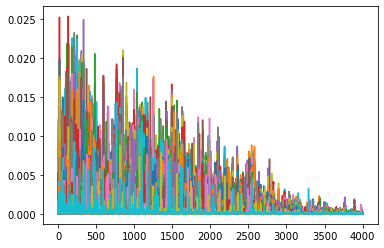

In [29]:
from matplotlib import pyplot as plt

unique_species = pd.unique(aggregated_meta.transpose().species.values)

for i in range(1000):    
    plot = plt.plot(aggregated_intensities.iloc[1:4000,i])

# Variance Differences
1. How is each 3-Da Bucket distributed.
    - a) is the distribution more similar for ONE species lower than for all the spectra?
    - b) is the distribution more similar for one antibiotic: S, R or I lower than for all of them combined?
    - c) is the distribution more similar for one laboratory data lower/higher than for combined laboratory data?
        - a2015-2018
        - b2018
        - c2018
        - d2018

In [36]:
# 1a - is the distribution more similar for ONE species lower than for all the spectra?
# First calculate variance for one bucket for one species
# Calculate combined variances (add all bucket variances)
# calculate variances for all other species individually
# calculate combined variances
# plot variances for species and combined species


unique_species = pd.value_counts(aggregated_meta.transpose().species.values).index
unique_species.values.resize(20,refcheck=False)
unique_species = unique_species.values

species_var = pd.DataFrame()
total_aggr = []

for curr_species in unique_species:
    aggregated_meta.transpose()["species"]
    curr_meta = aggregated_meta.transpose()[aggregated_meta.transpose()["species"] == curr_species]
    curr_meta = curr_meta.transpose()
    curr_species_aggregated = aggregated_intensities.transpose().join(curr_meta.transpose(),how='inner')
    total_aggr.append(curr_species_aggregated)
    #species_var[curr_species] = (curr_species_aggregated.var(numeric_only=True))
    species_var[curr_species] = (curr_species_aggregated.mean(numeric_only=True))
#total_aggr_var = pd.concat(total_aggr).var(numeric_only=True)
#sample_aggr_var = pd.concat(total_aggr).sample(n=1000,random_state=20).var(numeric_only=True)
species_var

,Escherichia coli,Staphylococcus aureus,Staphylococcus epidermidis,Klebsiella pneumoniae,Pseudomonas aeruginosa,Enterococcus faecalis,Gardnerella vaginalis,Proteus mirabilis,Streptococcus agalactiae,Propionibacterium acnes,Enterobacter cloacae,Candida albicans,Enterococcus faecium,Streptococcus anginosus,Serratia marcescens,Staphylococcus hominis,Morganella morganii,Staphylococcus haemolyticus,Klebsiella oxytoca,Citrobacter freundii
0,0.000486,0.000350,0.000515,0.000574,0.000625,0.000550,0.001136,0.000383,0.000562,0.000580,0.000488,0.000721,0.000584,0.000653,0.000513,0.000442,0.000374,0.000474,0.000631,0.000399
1,0.000493,0.000334,0.000572,0.000590,0.000534,0.000460,0.001117,0.000204,0.000957,0.000464,0.000479,0.000757,0.000676,0.000809,0.000303,0.000438,0.000279,0.000589,0.000555,0.000370
2,0.000400,0.000306,0.000517,0.000619,0.000462,0.000401,0.000649,0.000375,0.000840,0.000446,0.000478,0.000537,0.000526,0.000569,0.000295,0.000379,0.000321,0.000475,0.000492,0.000444
3,0.000407,0.000419,0.000396,0.000580,0.000776,0.000457,0.000422,0.000662,0.000455,0.000670,0.000482,0.000509,0.000554,0.000371,0.000430,0.000468,0.000447,0.000378,0.000437,0.000517
4,0.000468,0.000555,0.000586,0.000469,0.000956,0.000615,0.000701,0.000707,0.000494,0.001028,0.000445,0.000743,0.001022,0.000543,0.000533,0.000649,0.000587,0.000510,0.000394,0.000545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000041,0.000040,0.000041,0.000042,0.000041,0.000041,0.000044,0.000041,0.000042,0.000044,0.000041,0.000044,0.000040,0.000042,0.000044,0.000042,0.000041,0.000040,0.000040,0.000043
5996,0.000041,0.000039,0.000041,0.000042,0.000041,0.000040,0.000043,0.000040,0.000041,0.000044,0.000041,0.000044,0.000039,0.000041,0.000045,0.000041,0.000039,0.000039,0.000040,0.000041
5997,0.000042,0.000039,0.000042,0.000042,0.000041,0.000040,0.000044,0.000040,0.000041,0.000045,0.000041,0.000044,0.000038,0.000042,0.000046,0.000043,0.000040,0.000039,0.000042,0.000042
5998,0.000042,0.000039,0.000041,0.000042,0.000041,0.000039,0.000043,0.000040,0.000040,0.000043,0.000041,0.000042,0.000038,0.000041,0.000045,0.000042,0.000039,0.000039,0.000040,0.000041


Text(0.5, 1.0, 'E. Coli')

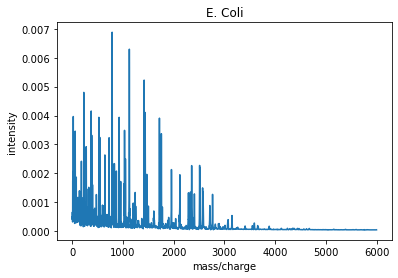

In [233]:
import seaborn as sns

myplot1 = sns.lineplot(data=species_var.iloc[:,0])
myplot1.set_xlabel("mass/charge")
myplot1.set_ylabel("intensity")
myplot1.set_title("E. Coli")


Text(0.5, 1.0, 'S. Aureus')

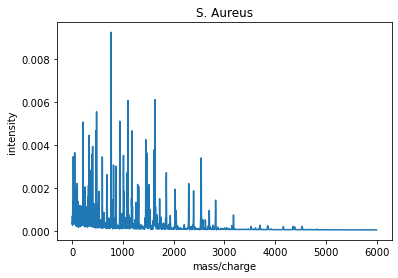

In [239]:
myplot1 = sns.lineplot(data=species_var.iloc[:,1])
myplot1.set_xlabel("mass/charge")
myplot1.set_ylabel("intensity")
myplot1.set_title("S. Aureus")



Text(0.5, 1.0, 'S. Epidermidis')

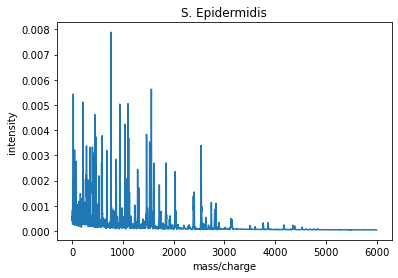

In [240]:
myplot3 = sns.lineplot(data=species_var.iloc[:,2])
myplot3.set_xlabel("mass/charge")
myplot3.set_ylabel("intensity")
myplot3.set_title("S. Epidermidis")


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

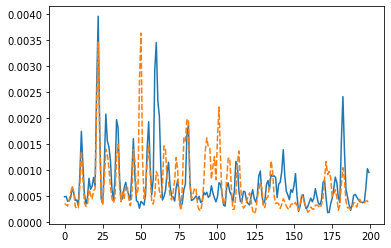

In [201]:
#myplot4 =sns.lineplot(data=species_var.iloc[:,3],x="Bucket", y="Mean Value")

#sns.lineplot(species_var.transpose(),x="0",y="1")
plot = sns.lineplot(data=species_var.iloc[0:200,0:2],legend=0)
plot.savefig('results/'+'first200buckets'+'_strains'+'.png')
#plot.




Text(0.5, 1.0, 'K. Pneumoniae')

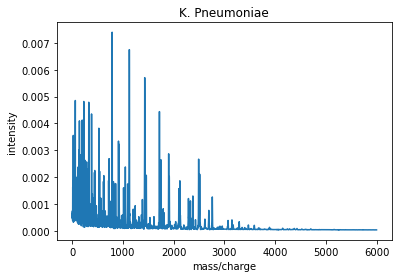

In [237]:
myplot5 = sns.lineplot(data=species_var.iloc[:,3])
myplot5.set_xlabel("mass/charge")
myplot5.set_ylabel("intensity")
myplot5.set_title("K. Pneumoniae")



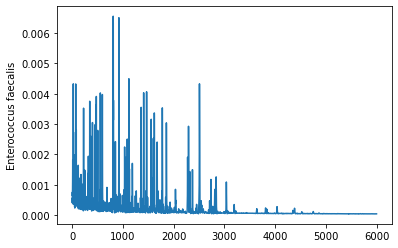

In [61]:
myplot6 = sns.lineplot(data=species_var.iloc[:,5])

In [114]:
#sns.lineplot(data = aggregated_intensities)
from numpy import nan


num_meta = aggregated_meta.replace('R',0)
num_meta=num_meta.replace('S',1)
num_meta=num_meta.replace('I',2)
num_meta=num_meta.replace(nan,3)
num_meta=num_meta.replace('-',3)
#sns.lineplot(data=num_meta)

In [118]:
num_meta.loc['Ciprofloxacin',:].value_counts()

3                   85749
1                   36822
0                    8578
2                     760
R(1), S(1)            247
I(1), S(1)             77
R(1), I(1)             38
R(1), I(1), S(1)        7
S(2)                    4
R(2)                    4
Name: Ciprofloxacin, dtype: int64

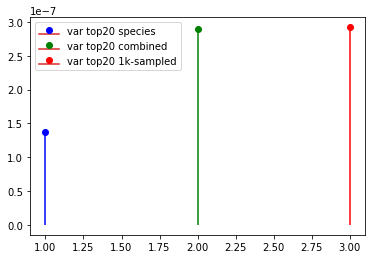

In [18]:
#mean_species_var= species_var.agg("mean", axis="rows")
#mean_total_aggr_var = total_aggr_var.agg("mean", axis="rows")
#mean_sample_aggr_var = sample_aggr_var.agg("mean", axis="rows")

#mean_mean_species_var = mean_species_var.agg("mean")

#fig, ax = plt.subplots()
#ax.stem(1,mean_mean_species_var,'b',label="var top20 species")
#ax.stem(2,mean_total_aggr_var,'g',label="var top20 combined")
#ax.stem(3,mean_sample_aggr_var,'r',label="var top20 1k-sampled")

#leg = ax.legend()

#plt.show()


In [76]:
# 1b - is the distribution more similar for one antibiotic: S, R or I lower than for all of them combined?
# Test for top 20 species, if there is a stronger correlation inside the species depending on S, R or I for the most important antibiotics
# Test for one species: variance s, r , i and all combined
antibiotics = ['Ciprofloxacin','Meropenem','Piperacillin-Tazobactam','Amoxicillin-Clavulanic acid'] # TODO: removed 4 antibiotics

unique_species = pd.value_counts(aggregated_meta.transpose().species.values).index
unique_species.values.resize(5,refcheck=False) # TODO: only 5 currently
unique_species = unique_species.values

In [84]:
import numpy


resistance_var = pd.Series()
susceptible_var = pd.Series()
#intermediate_var = pd.Series(numpy.float64)
total_var = pd.Series()




for curr_species in unique_species:
    aggregated_meta.transpose()["species"]
    curr_meta = aggregated_meta.transpose()[aggregated_meta.transpose()["species"] == curr_species]
    curr_meta = curr_meta.transpose()
    curr_species_aggregated = aggregated_intensities.transpose().join(curr_meta.transpose(),how='inner')
    for ab in antibiotics:
        #print(curr_species_aggregated.shape)
        #print(curr_species_aggregated[ab].value_counts())
        #print(curr_species_aggregated.groupby(ab).var(numeric_only=True).loc['R',:].mean())
        resistance_var[curr_species+ab] = curr_species_aggregated.groupby(ab).mean(numeric_only=True).loc['R',:]#.mean()*10000000
        susceptible_var[curr_species+ab] = curr_species_aggregated.groupby(ab).mean(numeric_only=True).loc['S',:]#.mean()*10000000
        #intermediate_var[curr_species+ab] = curr_species_aggregated.groupby(ab).var(numeric_only=True).loc['I',:].mean()
        antibiotic = curr_species_aggregated.loc[:,ab]
        antibiotic= antibiotic.drop(antibiotic[(antibiotic.values != 'S')&(antibiotic.values != 'R')].index).index
        total_var[curr_species+ab] = curr_species_aggregated.loc[antibiotic,:].mean(numeric_only=True)#.mean()*10000000
combined_dataframe = pd.concat([resistance_var.to_frame().T,susceptible_var.to_frame().T,total_var.to_frame().T], keys=['resistance_var', 'susceptible_var','total_var'])
#TODO: Complete BS inside the Dataframes
#combined_dataframe
#sns.lineplot(resistance_var)
resistance_var.loc['Escherichia coliCiprofloxacin']

C:\Users\jonas\AppData\Local\Temp\ipykernel_5168\480168192.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  resistance_var = pd.Series()
C:\Users\jonas\AppData\Local\Temp\ipykernel_5168\480168192.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  susceptible_var = pd.Series()
C:\Users\jonas\AppData\Local\Temp\ipykernel_5168\480168192.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  total_var = pd.Series()


0       0.000471
1       0.000544
2       0.000443
3       0.000390
4       0.000427
          ...   
5995    0.000041
5996    0.000041
5997    0.000041
5998    0.000041
5999    0.000041
Name: R, Length: 6000, dtype: float64

Text(0.5, 1.0, 'S. Aureus - Meropenem Resistent')

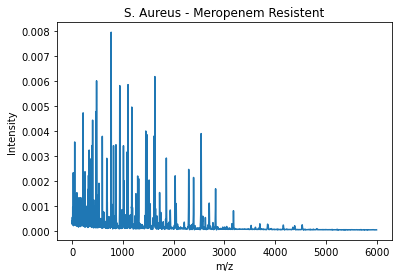

In [247]:
plot = sns.lineplot(data=resistance_var.loc['Staphylococcus aureusMeropenem'])
plot.set_xlabel("m/z")
plot.set_ylabel("Intensity")
plot.set_title("S. Aureus - Meropenem Resistent")
#sns.lineplot(data=susceptible_var.loc['Escherichia coliCiprofloxacin'])

Text(0.5, 1.0, 'S. Aureus - Meropenem Susceptible')

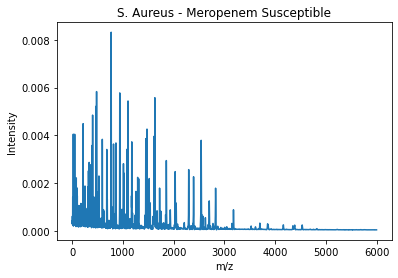

In [248]:
plot=sns.lineplot(data=susceptible_var.loc['Staphylococcus aureusMeropenem'])
plot.set_xlabel("m/z")
plot.set_ylabel("Intensity")
plot.set_title("S. Aureus - Meropenem Susceptible")

<AxesSubplot: >

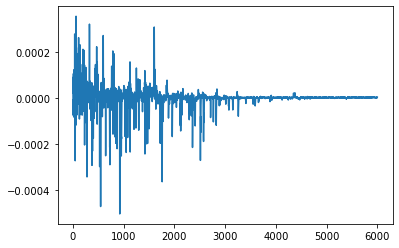

In [94]:
sns.lineplot(data=susceptible_var.loc['Escherichia coliCiprofloxacin'].subtract(resistance_var.loc['Escherichia coliCiprofloxacin']))


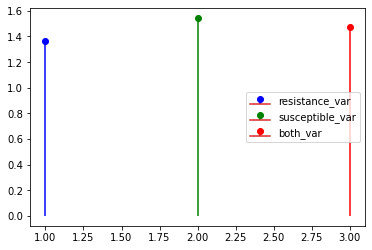

In [21]:
res_one = combined_dataframe.loc['resistance_var',:].mean().mean()
sus_one = combined_dataframe.loc['susceptible_var',:].mean().mean()
tot_one = combined_dataframe.loc['total_var',:].mean().mean()

fig, ax = plt.subplots()
ax.stem(1,res_one,'b',label="resistance_var")
ax.stem(2,sus_one,'g',label="susceptible_var")
ax.stem(3,tot_one,'r',label="both_var")

leg = ax.legend()

plt.show()

# Interpretation: Resistance Variance is slightly lower, which indicates that resistant microbiomes have similar MALDI-TOF spectra

In [22]:
# 1 c is the distribution more similar for one laboratory data lower/higher than for combined laboratory data?

In [ ]:
import seaborn as sns
sns.lineplot()

In [120]:
# filter out only one antibiotic and one bacterial species

bacterial_species = 'Staphylococcus aureus' # s. aureus, ecoli, s epidermidis, k pneumoniae
predicted_antibiotic = 'Ciprofloxacin' # Ciprofloxacin etc.
aggregated_meta.transpose()["species"]
aggregated_meta = aggregated_meta.transpose()[aggregated_meta.transpose()["species"] == bacterial_species]
aggregated_meta = aggregated_meta.transpose()
species_aggregated = aggregated_meta.transpose().join(aggregated_intensities.transpose(),how='inner')
species_aggregated

,species,Ciprofloxacin,Oxacillin,Cefepime,Ceftriaxone,Meropenem,Piperacillin-Tazobactam,Tobramycin,Amoxicillin-Clavulanic acid,0,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
9214cf45-e64d-4144-ace8-c9957ee2911d,Staphylococcus aureus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000295,...,0.000140,0.000198,0.000117,0.000082,5.524528e-05,0.000048,9.151334e-07,0.000005,0.000011,0.000017
014f7a4f-1938-4292-a408-0c4bcf62b477,Staphylococcus aureus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000145,...,0.000103,0.000103,0.000030,0.000015,2.512901e-05,0.000068,5.867690e-05,0.000063,0.000069,0.000068
481b1556-875f-4867-befc-c8bffa051816,Staphylococcus aureus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000711,...,0.000024,0.000028,0.000018,0.000022,3.179601e-05,0.000033,6.211655e-05,0.000072,0.000069,0.000082
49eceea6-f184-4ed2-9cf6-e6d411c47f85,Staphylococcus aureus,S,S,S,S,S,S,-,S,0.000619,...,0.000037,0.000096,0.000081,0.000072,3.728805e-05,0.000089,7.568782e-05,0.000090,0.000078,0.000104
4acb06b7-df85-4c52-b85e-7e65701d1894,Staphylococcus aureus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000698,...,0.000032,0.000062,0.000030,0.000029,2.491588e-05,0.000033,2.335905e-05,0.000024,0.000020,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a28bd5c4-a668-4228-85f6-aa7a0efa037d_3313,Staphylococcus aureus,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000017,...,0.000047,0.000009,0.000010,0.000003,4.256252e-06,0.000019,5.733692e-05,0.000064,0.000086,0.000098
4267daeb-4f1a-4597-a801-f3c402f86c27_3312,Staphylococcus aureus,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000207,0.000112,0.000086,0.000073,9.266152e-05,0.000058,7.405658e-05,0.000078,0.000089,0.000030
e22457e5-bdd8-456e-ade7-89780d04c26b_3313,Staphylococcus aureus,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000328,...,0.000106,0.000092,0.000075,0.000007,2.389711e-07,0.000012,4.917795e-05,0.000033,0.000045,0.000072
a89c8389-763b-4eca-8be2-e7a2ee59d16b_3313,Staphylococcus aureus,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000022,0.000011,0.000008,0.000012,1.458491e-05,0.000008,1.329187e-05,0.000044,0.000079,0.000087


In [122]:
#
#from matplotlib import pyplot as plt


#for i in range(10):    
 #   plot = plt.plot(species_aggregated.iloc[1:400,i], linewidth=0.2)

In [123]:
# split Dataframe again
ecoli_meta = species_aggregated.loc[:,['species',predicted_antibiotic]].transpose()
ecoli_intensity = species_aggregated.loc[:,0:5999].transpose()

# Learning
- This part prepares the data which was loaded for a specific classification purpose
- Two tables are expected as input one for classification results and one which represents the input data (specifically MALDI-TOF spectra)

In [124]:
# Additional preprocessing for ML
# Set local variables to the specific dataset

####Swap variables for other input 
code_med_df = ecoli_meta #ciproflaxacin_driamsb
intensity_df = ecoli_intensity #intensity_driamsb_df
#################################

clean_code_med_df = code_med_df.dropna(axis=1)

#####
## interesting how many labels of each there are
# driamsB, ciproflaxacin: s: 1680, r:302, i: 37
clean_code_med_df.iloc[1].value_counts()
# species identifications
clean_code_med_df.iloc[0].value_counts()
#####

# transform s r and i into Integer values for classification
d = {'S': 0, 'R': 1, 'I': 1}

clean_transposed = clean_code_med_df.transpose()

clean_transposed[predicted_antibiotic] = clean_transposed[predicted_antibiotic].map(d)
clean_code_med_df = clean_transposed.transpose()

### Swap variables for other output
driams_meta = clean_code_med_df
driams_data = intensity_df
#################################

In [125]:
concatenated_driams = pd.concat([driams_data,driams_meta],axis=0)
concatenated_driams = concatenated_driams.dropna(axis=1)
driams_meta_dna = concatenated_driams.loc[[predicted_antibiotic],:].transpose() ## removed species
driams_data_dna = concatenated_driams.loc[0:5999].transpose()

([<matplotlib.patches.Wedge at 0x23852e20c10>,
 [Text(-1.027667548414596, 0.3923001528619817, ''),
  Text(1.0276675484145956, -0.3923001528619823, '')])

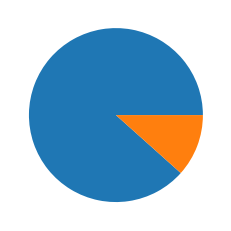

In [126]:
import matplotlib.pyplot as plt


plt.pie(clean_code_med_df.transpose()[predicted_antibiotic].value_counts())

In [127]:
indices = driams_data_dna.index
scaler = StandardScaler()
scaler.fit(driams_data_dna)
#print(scaler.mean_)
driams_data_dna = pd.DataFrame(scaler.transform(driams_data_dna))
driams_data_dna = driams_data_dna.set_index(indices)

In [128]:
from matplotlib.pyplot import plot

ecoli_intensity
ecoli_meta.transpose().value_counts()

species                Ciprofloxacin   
Staphylococcus aureus  S                   6191
                       R                    700
                       I                    113
                       R(1), S(1)            17
                       -                     16
                       I(1), S(1)             9
                       R(1), I(1)             4
                       R(1), I(1), S(1)       2
dtype: int64

In [129]:
### MACHINE LEARNING ###### MACHINE LEARNING ###### MACHINE LEARNING ###### MACHINE LEARNING ###

In [130]:
### Train Test Split
X_train, X_test, y_train, y_test = train_test_split(driams_data_dna,driams_meta_dna)
y_train.loc[:,predicted_antibiotic] = pd.to_numeric(y_train.loc[:,predicted_antibiotic], errors='coerce')
y_test.loc[:,predicted_antibiotic] = pd.to_numeric(y_test.loc[:,predicted_antibiotic], errors='coerce')

y_train= y_train.iloc[0:3520,:]
y_test = y_test.iloc[0:1152,:]
X_train = X_train.iloc[0:3520,:]
X_test = X_test.iloc[0:1152,:]

y_true=y_test.loc[:,predicted_antibiotic].values

C:\Users\jonas\AppData\Local\Temp\ipykernel_5168\4106969111.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  y_train.loc[:,predicted_antibiotic] = pd.to_numeric(y_train.loc[:,predicted_antibiotic], errors='coerce')
C:\Users\jonas\AppData\Local\Temp\ipykernel_5168\4106969111.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  y_test.loc[:,predicted_antibiotic] = pd.to_numeric(y_test.loc[:,predicted_antibiotic], errors='coerce')


In [131]:
# Tree classifier as simple reference
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train,y_train)
tree_y_pred_proba= tree_clf.predict_proba(X_test)
tree_y_pred = tree_clf.predict(X_test)

In [132]:
# Dummy classifier for reference only predicts one class
dummy_clf = dummy.DummyClassifier(strategy='prior')
dummy_clf = dummy_clf.fit(X_train,y_train)
dummy_y_pred_proba= dummy_clf.predict_proba(X_test)
dummy_y_pred = dummy_clf.predict(X_test)

In [133]:
## Dataset is too unbalanced for logistic regression it seems?
## only predicts one class
log_clf = linear_model.LogisticRegression(max_iter=400)
log_clf = log_clf.fit(X_train,y_train.values.ravel())
log_y_pred = log_clf.predict(X_test)
log_y_pred_proba = log_clf.predict_proba(X_test)
log_clf.score(X_test,y_test)


0.8758680555555556

In [134]:
rfo_clf = RandomForestClassifier(n_estimators=100)
rfo_clf = rfo_clf.fit(X_train,y_train.values.ravel())
rfo_y_pred_proba = rfo_clf.predict_proba(X_test)
rfo_y_pred = rfo_clf.predict(X_test)

In [135]:
print("Accuracy Tree:",accuracy_score(y_true,tree_y_pred))
print("Accuracy Dummy:",accuracy_score(y_true,dummy_y_pred))
print("Accuracy Logistic:",accuracy_score(y_true,log_y_pred))
print("Accuracy Random Forest:",accuracy_score(y_true,rfo_y_pred))

Accuracy Tree: 0.8255208333333334
Accuracy Dummy: 0.8758680555555556
Accuracy Logistic: 0.8758680555555556
Accuracy Random Forest: 0.8949652777777778


In [136]:
print("Balanced Accuracy Tree:",balanced_accuracy_score(y_true,tree_y_pred))
print("Balanced Accuracy Dummy:",balanced_accuracy_score(y_true,dummy_y_pred))
print("Balanced Accuracy Logistic:",balanced_accuracy_score(y_true,log_y_pred))
print("Balanced Accuracy Random Forest:",balanced_accuracy_score(y_true,rfo_y_pred))

Balanced Accuracy Tree: 0.621306839840041
Balanced Accuracy Dummy: 0.5
Balanced Accuracy Logistic: 0.6530491312453652
Balanced Accuracy Random Forest: 0.5769230769230769


In [137]:
y_pred=log_y_pred

In [138]:
#y_proba=log_y_pred_proba[:,1]
y_proba=dummy_y_pred_proba[:,1]

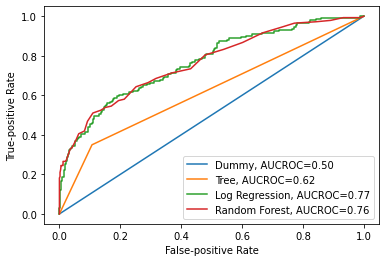

In [139]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, thresh = metrics.roc_curve(y_true, dummy_y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_true, dummy_y_pred_proba[:,1])
plt.plot(fpr,tpr,label=f"Dummy, AUCROC={auc:.2f}")

fpr, tpr, thresh = metrics.roc_curve(y_true, tree_y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_true, tree_y_pred_proba[:,1])
plt.plot(fpr,tpr,label=f"Tree, AUCROC={auc:.2f}")

fpr, tpr, thresh = metrics.roc_curve(y_true, log_y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_true, log_y_pred_proba[:,1])
plt.plot(fpr,tpr,label=f"Log Regression, AUCROC={auc:.2f}")

fpr, tpr, thresh = metrics.roc_curve(y_true, rfo_y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_true, rfo_y_pred_proba[:,1])
plt.plot(fpr,tpr,label=f"Random Forest, AUCROC={auc:.2f}")

plt.ylabel("True-positive Rate")
plt.xlabel("False-positive Rate")

plt.legend(loc=0)

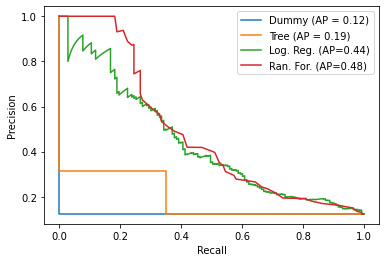

In [140]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


disp = metrics.PrecisionRecallDisplay.from_predictions(y_true, dummy_y_pred_proba[:,1],ax=plt.axes(),name="Dummy")
metrics.PrecisionRecallDisplay.from_predictions(y_true, tree_y_pred_proba[:,1],ax=disp.ax_,name="Tree")


#prec, reca, thresh = metrics.precision_recall_curve(y_true, dummy_y_pred_proba[:,1])
#prc = metrics.average_precision_score(y_true, dummy_y_pred_proba[:,1])
#plt.plot(reca,prec,label=f"Dummy, PRC={prc:.2f}")

prec, reca, thresh = metrics.precision_recall_curve(y_true, log_y_pred_proba[:,1])
prc = metrics.average_precision_score(y_true, log_y_pred_proba[:,1])
plt.plot(reca,prec,label=f"Log. Reg. (AP={prc:.2f})")

#prec, reca, thresh = metrics.precision_recall_curve(y_true, tree_y_pred_proba[:,1])
#prc = metrics.average_precision_score(y_true, tree_y_pred_proba[:,1])
#plt.plot(reca,prec,label=f"Tree, PRC={prc:.2f}")

prec, reca, thresh = metrics.precision_recall_curve(y_true, rfo_y_pred_proba[:,1])
prc = metrics.average_precision_score(y_true, rfo_y_pred_proba[:,1])
plt.plot(reca,prec,label=f"Ran. For. (AP={prc:.2f})")



plt.ylabel("Precision")
plt.xlabel("Recall")

plt.legend(loc=0)

In [141]:
###AUPRC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

print(precision_score(y_true,y_pred))
print(recall_score(y_true,y_pred))
print(roc_auc_score(y_true,y_pred))
print(f1_score(y_true,y_pred))
print(confusion_matrix(y_true,y_pred))

0.5
0.35664335664335667
0.6530491312453651
0.4163265306122449
[[958  51]
 [ 92  51]]


In [142]:
filter_arr = y_pred == 1
y_pred[filter_arr].size

102

In [143]:
###########################################
###########################################
############ Deep Learning ################
###########################################
###########################################

In [144]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

In [145]:
#Variables to train on
X_train

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
28062508680_A7,-0.036354,-1.076177,-0.593135,0.029102,0.277793,-0.398055,-0.299814,1.190583,0.241240,-0.240197,...,0.638896,0.804354,0.838625,1.135431,1.338911,-0.132194,-0.451684,-0.524250,-0.012011,-0.464124
b1fcc212-c96f-4006-9194-503d56857bd5_MALDI1,0.145500,0.855720,0.972728,-0.718328,-0.434075,-0.323351,0.503336,1.298747,0.250803,-0.481629,...,1.499475,-0.446128,-0.688527,-0.705933,-0.692479,-0.766197,-1.097004,-1.090599,-1.055207,-1.111097
de5b4d89-084a-47cf-a823-e37418e6e8cb_MALDI1,-0.714586,-0.834126,-0.523498,-0.036250,-0.045176,-0.440375,-0.251320,-0.535142,-0.725772,-0.408417,...,0.868688,1.820490,0.698246,-0.191920,-0.635806,-0.764509,0.019085,0.035634,-0.037140,-0.185114
ffd2f70e-a502-4ded-bf1f-fc0a8523c713,1.122707,2.426653,2.009029,-0.249126,-0.405032,0.074154,-0.253351,-0.872554,-0.579270,-0.620781,...,0.572459,-0.327328,-1.042480,-0.975240,-0.897582,-0.578979,-0.303900,-0.441656,0.419178,-0.550777
79aa7519-2ab4-4697-9d04-fc5070020179_3313,-0.332694,0.716941,-0.105141,-0.744399,-0.706806,0.506179,2.303845,0.503421,-0.392832,-0.211866,...,-0.714561,-0.819545,-0.521128,-0.593093,-0.474758,-0.694155,-0.371850,-0.496702,-0.529950,-0.865416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e4ffc7db-50f0-4691-9309-58e87379e184_MALDI1,-0.045661,0.185788,-0.569562,-0.499428,-0.356457,-0.666827,-0.336036,-0.540505,-0.796041,-0.324807,...,-0.393225,-0.743545,-0.031824,-0.307457,-0.613859,-0.907496,0.496141,0.079354,0.573852,0.917590
28011909830_F4,0.649594,-0.520441,-0.494098,-0.120691,0.413728,0.374288,-0.364835,-0.653248,-0.776202,-0.031693,...,-1.031570,-0.542667,-0.590024,-0.290493,0.178654,1.527560,1.178825,1.228410,1.413317,1.158600
c905bb4d-2913-4b86-9d1a-44202a1d7ee6_3313,-0.881893,-0.844373,-0.215325,-0.052298,0.016803,-0.471466,-0.067294,-0.060732,-0.682576,0.137089,...,-0.557749,-0.802479,-1.207753,-0.948707,0.294735,-0.292113,-0.413420,-0.299565,0.169151,-0.457141
a9e6527c-9d4b-42ef-b47c-cdf38489d6c4_3312,1.066153,-0.213895,-0.688173,-0.520286,-0.728969,0.371950,0.510118,-0.564516,-0.277983,-0.449821,...,0.310640,0.119332,0.679344,1.375476,2.175965,0.189614,0.065792,-0.480971,-0.216987,0.433052


In [146]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
701db1ba-a370-4a4e-8050-b1419e796dc3_MALDI2,-0.831862,-0.071253,0.073691,0.079704,-0.687144,-0.737233,0.500315,1.642885,-0.397925,-0.376210,...,-0.731124,-0.447755,-0.795034,-0.957313,-1.168005,-1.209258,-1.239270,-1.263669,-1.268814,-1.247969
cdc3158f-e5f9-4121-bc60-f7295be74bfd,-0.304377,1.328135,5.272191,2.926181,5.061267,2.898337,0.020584,-0.726925,-0.755594,0.886607,...,0.003618,0.583948,1.314919,3.032001,1.700399,0.639287,-0.353417,-0.814607,-0.879001,-0.528695
ddcb30aa-599d-4394-9e81-94b77c8039c6_3312,0.298454,-0.933462,-0.809485,-0.371208,0.145247,2.687402,3.623848,1.233931,-0.767058,-0.120386,...,0.861280,0.877090,0.108709,-0.722242,-1.131674,-1.115178,-1.167063,-0.866948,-0.884133,-0.491586
28051902270_A2,-0.257679,-1.074358,0.614885,1.480254,1.402816,3.490673,2.845377,-0.189271,-0.128902,1.927113,...,-1.173382,-0.829652,-0.205451,1.105938,0.154973,0.337957,0.624361,0.231535,-0.032905,-0.222692
6fe0ec82-6ea9-468c-be87-6ae46c73e6dc_3313,0.051354,0.938415,-0.551250,-0.470293,-0.407044,1.348720,1.903401,0.726543,-0.795716,-0.183088,...,2.483320,2.477158,4.345698,1.773739,1.458914,1.068832,1.652241,-0.201998,-0.494891,-0.695851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68b238ed-54d4-4cc1-a8c7-7b0f64ff9fec_MALDI1,0.740124,0.162970,0.151174,-0.319133,-0.619995,-0.452203,-0.020871,0.100968,0.239864,-0.248697,...,-0.647627,-1.078742,-1.129428,-1.023861,-1.007311,-0.581273,-0.745794,-0.661217,-0.729692,-0.528974
04d86435-7323-4740-81f1-d2675f0cdcf2,0.057256,-0.385998,-0.382333,-0.471982,-0.727411,-0.715808,-0.927749,0.197170,0.371510,-0.491318,...,0.637582,1.604335,2.056490,3.784447,1.539172,1.029270,0.444183,0.993719,0.254159,0.740757
0bf5d9e0-48d0-4aba-ba32-eb82cf588590_3312,0.318884,0.699425,-0.720478,0.125732,-0.257258,-0.667185,-0.151280,2.278885,1.403589,-0.594678,...,0.648481,0.945677,0.175634,-0.194997,-0.616812,-0.552779,-0.620943,-0.433533,-0.838604,-0.842561
81c127a8-9eb7-484e-871d-d0119e494918,-0.185952,-0.456981,-0.213024,-0.219275,-0.699575,-0.959757,-0.354650,-0.192354,-0.515059,-0.244587,...,0.020894,0.597980,-0.017005,-0.207264,-0.642078,-0.919481,-1.091069,-0.904211,-0.706533,0.463757


In [147]:
y_train

,Ciprofloxacin
28062508680_A7,0.0
b1fcc212-c96f-4006-9194-503d56857bd5_MALDI1,0.0
de5b4d89-084a-47cf-a823-e37418e6e8cb_MALDI1,0.0
ffd2f70e-a502-4ded-bf1f-fc0a8523c713,0.0
79aa7519-2ab4-4697-9d04-fc5070020179_3313,0.0
...,...
e4ffc7db-50f0-4691-9309-58e87379e184_MALDI1,1.0
28011909830_F4,0.0
c905bb4d-2913-4b86-9d1a-44202a1d7ee6_3313,0.0
a9e6527c-9d4b-42ef-b47c-cdf38489d6c4_3312,0.0


In [148]:
y_test

,Ciprofloxacin
701db1ba-a370-4a4e-8050-b1419e796dc3_MALDI2,0.0
cdc3158f-e5f9-4121-bc60-f7295be74bfd,0.0
ddcb30aa-599d-4394-9e81-94b77c8039c6_3312,0.0
28051902270_A2,0.0
6fe0ec82-6ea9-468c-be87-6ae46c73e6dc_3313,0.0
...,...
68b238ed-54d4-4cc1-a8c7-7b0f64ff9fec_MALDI1,0.0
04d86435-7323-4740-81f1-d2675f0cdcf2,0.0
0bf5d9e0-48d0-4aba-ba32-eb82cf588590_3312,0.0
81c127a8-9eb7-484e-871d-d0119e494918,0.0


# Calculate Mean and Standard Deviation of Dataset

In [149]:
#ROOT = '.data'

#train_data = X_train

#mean = X_train.mean() / 255
#std = X_train.std() / 255

#print(f'Calculated mean: {mean}')
#print(f'Calculated std: {std}')
#X_train

In [150]:
### Train Test Split
#X_train, X_test, y_train, y_test = train_test_split(driams_data_dna,driams_meta_dna)
#y_train.loc[:,'Ciprofloxacin'] = pd.to_numeric(y_train.loc[:,'Ciprofloxacin'], errors='coerce')
#y_test.loc[:,'Ciprofloxacin'] = pd.to_numeric(y_test.loc[:,'Ciprofloxacin'], errors='coerce')
#y_true=y_test.Ciprofloxacin.values
# X_train has 5253 rows and 6000 columns 
# X_test has 1751 rows and 6000 columns
# y_train has 5253 rows and 1 column
# y_test has 1751 rows and 1 column

In [151]:

X_train           = torch.FloatTensor(X_train.values)

X_test            = torch.FloatTensor(X_test.values)

y_train           = torch.LongTensor(y_train.values)

y_test            = torch.LongTensor(y_test.values)


In [152]:
train_dataset = data.TensorDataset(X_train,y_train)
test_dataset = data.TensorDataset(X_test,y_test)

In [153]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_dataset) * VALID_RATIO)
n_valid_examples = len(train_dataset) - n_train_examples

train_data, valid_data = data.random_split(train_dataset,
                                           [n_train_examples, n_valid_examples])

In [154]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_dataset)}')

Number of training examples: 3168
Number of validation examples: 352
Number of testing examples: 1152


In [155]:
train_data.dataset.__getitem__(3)

(tensor([ 1.1227,  2.4267,  2.0090,  ..., -0.4417,  0.4192, -0.5508]),
 tensor([0]))

In [156]:
BATCH_SIZE = 16



train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_dataset,
                                batch_size=BATCH_SIZE)

In [157]:
# Define Model
class ANN_model(nn.Module):

    def __init__(self,input_features=6000 ,hidden1=20, hidden2=10,out_features=1):

        super().__init__()

        self.f_connected1 = nn.Linear(input_features,hidden1)

        self.f_connected2 = nn.Linear(hidden1,hidden2)

        self.out = nn.Linear(hidden2,out_features)

        

    def forward(self,x):

        x = nn.functional.relu(self.f_connected1(x))

        x = nn.functional.relu(self.f_connected2(x))

        x = self.out(x)

        return x

In [158]:
model = ANN_model()

In [159]:
# Define Loss function
loss_function = nn.CrossEntropyLoss()   

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)  



epochs=50

final_losses=[]

for i in range(epochs):

    i= i+1

    y_pred=model.forward(X_train)

    loss=loss_function(y_pred,y_train.float())

    final_losses.append(loss)

    if i % 10 == 1:

        print("Epoch number: {} and the loss : {}".format(i,loss.item()))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

Epoch number: 1 and the loss : -0.0
Epoch number: 11 and the loss : -0.0
Epoch number: 21 and the loss : -0.0
Epoch number: 31 and the loss : -0.0
Epoch number: 41 and the loss : -0.0


In [160]:
# Test Model
def predict(dataset):

    predict_data = dataset

    predict_data_tensor = torch.tensor(predict_data) 

    prediction_value    = ANN_model(predict_data_tensor)

    # Dict for textual display of prediction

    outcomes            = {0: 'No',1:'Yes'}



    # From the prediction tensor, get index of the max value ( 0 or 1)

    prediction_index   = prediction_value.argmax().item()

    prediction = outcomes[prediction_index]

    # return(outcomes[prediction_index])

    return prediction

# Validation Split
- Split the Training Data into validation portion
- for multiple iterations

In [161]:
## This does not really work for now. Taken from Keras Code tried refactoring. ###

#model = nn.Sequential()
#model.append(nn.Conv1d(out_channels=1, kernel_size=3, in_channels=1)) ---- (64,1,6000)  // Channel müssen bei 1 liegen.
#model.append(nn.Conv1d(out_channels=1, kernel_size=3, in_channels=1)) ---- (64,1,6000)
#model.append(nn.Dropout(0.5))
#model.append(nn.MaxPool1d(kernel_size =2))
#model.append(nn.Flatten())
#model.append(nn.Linear(100, activation='relu'))
#model.append(nn.Linear(n_outputs, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Lenet Code adapted for 1-Dimension

In [162]:
num = '1'
# Hyperparameter Grid Search
# Alternative: Raytune?

In [163]:
class CNN(nn.Module):
    def __init__(self, output_dim):
        super().__init__()

        self.conv1 = nn.Conv1d(in_channels=BATCH_SIZE,
                               out_channels=BATCH_SIZE,
                               kernel_size=3,
                               stride=1)

        self.conv2 = nn.Conv1d(in_channels=BATCH_SIZE,
                               out_channels=BATCH_SIZE,
                               kernel_size=3,
                               stride=1
                               )

        self.fc_1 = nn.Linear(665, 83)
        self.fc_2 = nn.Linear(83, 40)
        self.fc_3 = nn.Linear(40, output_dim)

    def forward(self, x):

        # x = [batch size, 1, 6000]

        x = self.conv1(x)

        # x = [batch size, 1, 5998]

        x = F.max_pool1d(x, kernel_size=3)

        # x = [batch size, 1, 2000]

        x = F.silu(x)

        x = self.conv2(x)

        # x = [batch size, 1, 1998]

        x = F.max_pool1d(x, kernel_size=3)

        # x = [batch size, 1, 666]

        x = F.silu(x)

        x = x.view(x.shape[0], -1)

        # x = [batch size, 1, 666]

        h = x

        x = self.fc_1(x)

        # x = [batch size, 1, ??]

        x = F.silu(x)

        x = self.fc_2(x)

        # x = [batch size, 1, ??]

        x = F.silu(x)

        x = self.fc_3(x)

        # x = [batch size, 1, ??]

        return x, h

In [164]:
OUTPUT_DIM = 2

model = CNN(OUTPUT_DIM)

In [165]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 60,288 trainable parameters


In [166]:
# Optimize Model
optimizer = optim.Adam(model.parameters())

In [167]:
criterion = nn.CrossEntropyLoss()

In [168]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [169]:
model = model.to(device)
criterion = criterion.to(device)

In [170]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [171]:
def calculate_proba(y_pred, y):
    #val1 = [1/abs(y_pred[:,0] - y_pred[:,1]).cpu().detach().numpy(),1-1/abs(y_pred[:,0] - y_pred[:,1]).cpu().detach().numpy()]
    val2 = torch.sigmoid(y_pred)
    return val2

In [172]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y[:,0])

        acc = calculate_accuracy(y_pred, y[:,0])
       
        proba = calculate_proba(y_pred, y[:,0])

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

        proba

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [173]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y[:,0])

            acc = calculate_accuracy(y_pred, y[:,0])

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [174]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [175]:
train_iterator

In [176]:
EPOCHS = 30

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 5s
	Train Loss: 0.378 | Train Acc: 87.25%
	 Val. Loss: 0.377 |  Val. Acc: 87.78%
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.362 | Train Acc: 88.45%
	 Val. Loss: 0.376 |  Val. Acc: 87.78%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.362 | Train Acc: 88.45%
	 Val. Loss: 0.378 |  Val. Acc: 87.78%
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.360 | Train Acc: 88.45%
	 Val. Loss: 0.374 |  Val. Acc: 87.78%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.360 | Train Acc: 88.45%
	 Val. Loss: 0.371 |  Val. Acc: 87.78%
Epoch: 06 | Epoch Time: 0m 0s
	Train Loss: 0.360 | Train Acc: 88.42%
	 Val. Loss: 0.374 |  Val. Acc: 87.78%
Epoch: 07 | Epoch Time: 0m 0s
	Train Loss: 0.360 | Train Acc: 88.45%
	 Val. Loss: 0.372 |  Val. Acc: 87.78%
Epoch: 08 | Epoch Time: 0m 0s
	Train Loss: 0.359 | Train Acc: 88.45%
	 Val. Loss: 0.372 |  Val. Acc: 87.78%
Epoch: 09 | Epoch Time: 0m 0s
	Train Loss: 0.358 | Train Acc: 88.45%
	 Val. Loss: 0.372 |  Val. Acc: 87.78%
Epoch: 10 | Epoch Time: 0m 0

In [177]:
model.load_state_dict(torch.load('tut2-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.294 | Test Acc: 89.15%


In [178]:
def get_predictions(model, iterator, device):

    model.eval()

    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = torch.sigmoid(y_pred)

            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return labels, probs

In [179]:
labels, probs = get_predictions(model, test_iterator, device)

In [180]:
pred_labels = torch.argmax(probs, 1)
pred_labels

tensor([0, 1, 0,  ..., 0, 0, 0])

In [224]:
def plot_confusion_matrix(labels, pred_labels,method):

    fig = plt.figure(figsize=(10, 10))
    cm = confusion_matrix(labels, pred_labels,normalize='true') 
    cm = ConfusionMatrixDisplay(cm, display_labels=['S','R'])
    cm.plot(cmap='Blues')
    plt.savefig('results/'+bacterial_species+predicted_antibiotic+'cm'+method+str(BATCH_SIZE)+'.png')

In [182]:
print("accuracy",accuracy_score(y_true,dummy_y_pred))

accuracy 0.8758680555555556


In [183]:
print("Logreg")
print("accuracy",accuracy_score(y_true,log_y_pred))
print("precision_score",precision_score(y_true,log_y_pred))
print("recall_score",recall_score(y_true,log_y_pred))
print("roc_auc_score",roc_auc_score(y_true,log_y_pred))
print("f1_score",f1_score(y_true,log_y_pred))
print("confusion_matrix",confusion_matrix(y_true,log_y_pred))

print("RFO")
print("accuracy",accuracy_score(y_true,rfo_y_pred))
print("precision_score",precision_score(y_true,rfo_y_pred))
print("recall_score",recall_score(y_true,rfo_y_pred))
print("roc_auc_score",roc_auc_score(y_true,rfo_y_pred))
print("f1_score",f1_score(y_true,rfo_y_pred))
print("confusion_matrix",confusion_matrix(y_true,rfo_y_pred))

print("Maschine Learning")
print("accuracy",accuracy_score(y_true,pred_labels))
print("precision_score",precision_score(y_true,pred_labels))
print("recall_score",recall_score(y_true,pred_labels))
print("roc_auc_score",roc_auc_score(y_true,pred_labels))
print("f1_score",f1_score(y_true,pred_labels))
print("confusion_matrix",confusion_matrix(y_true,pred_labels))

Logreg
accuracy 0.8758680555555556
precision_score 0.5
recall_score 0.35664335664335667
roc_auc_score 0.6530491312453651
f1_score 0.4163265306122449
confusion_matrix [[958  51]
 [ 92  51]]
RFO
accuracy 0.8949652777777778
precision_score 1.0
recall_score 0.15384615384615385
roc_auc_score 0.5769230769230769
f1_score 0.2666666666666667
confusion_matrix [[1009    0]
 [ 121   22]]
Maschine Learning
accuracy 0.8914930555555556
precision_score 0.6551724137931034
recall_score 0.26573426573426573
roc_auc_score 0.6229563300921082
f1_score 0.3781094527363184
confusion_matrix [[989  20]
 [105  38]]


<Figure size 720x720 with 0 Axes>

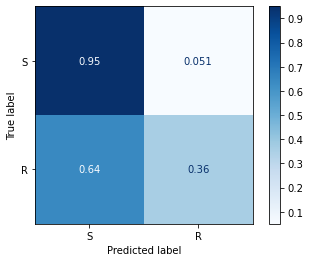

<Figure size 720x720 with 0 Axes>

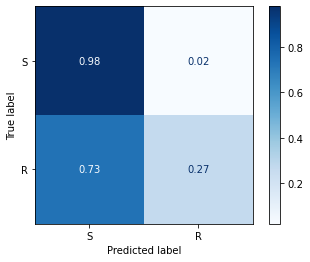

<Figure size 720x720 with 0 Axes>

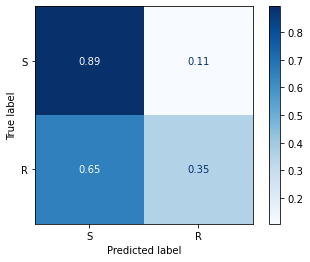

<Figure size 720x720 with 0 Axes>

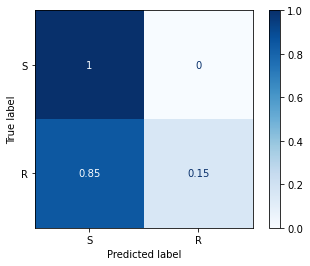

<Figure size 720x720 with 0 Axes>

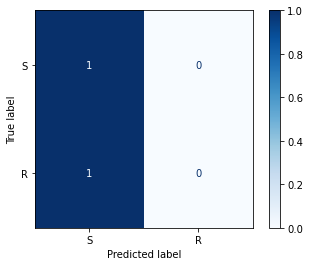

In [225]:
from locale import normalize


plot_confusion_matrix(labels, log_y_pred,'LogReg')
plot_confusion_matrix(labels, pred_labels,'1D-CNN')
plot_confusion_matrix(labels, tree_y_pred,'Tree')
plot_confusion_matrix(labels, rfo_y_pred,'RFO')
plot_confusion_matrix(labels, dummy_y_pred,'Dummy')

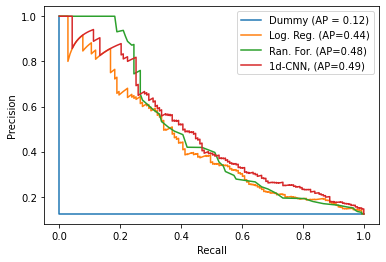

In [185]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


disp = metrics.PrecisionRecallDisplay.from_predictions(y_true, dummy_y_pred_proba[:,1],ax=plt.axes(),name="Dummy")
#metrics.PrecisionRecallDisplay.from_predictions(y_true, tree_y_pred_proba[:,1],ax=disp.ax_,name="Tree")


#prec, reca, thresh = metrics.precision_recall_curve(y_true, dummy_y_pred_proba[:,1])
#prc = metrics.average_precision_score(y_true, dummy_y_pred_proba[:,1])
#plt.plot(reca,prec,label=f"Dummy, PRC={prc:.2f}")

prec, reca, thresh = metrics.precision_recall_curve(y_true, log_y_pred_proba[:,1])
prc = metrics.average_precision_score(y_true, log_y_pred_proba[:,1])
plt.plot(reca,prec,label=f"Log. Reg. (AP={prc:.2f})")

#prec, reca, thresh = metrics.precision_recall_curve(y_true, tree_y_pred_proba[:,1])
#prc = metrics.average_precision_score(y_true, tree_y_pred_proba[:,1])
#plt.plot(reca,prec,label=f"Tree, PRC={prc:.2f}")

prec, reca, thresh = metrics.precision_recall_curve(y_true, rfo_y_pred_proba[:,1])
prc = metrics.average_precision_score(y_true, rfo_y_pred_proba[:,1])
plt.plot(reca,prec,label=f"Ran. For. (AP={prc:.2f})")

prec, reca, thresh = metrics.precision_recall_curve(y_true, probs[:,1])
prc = metrics.average_precision_score(y_true, probs[:,1])
plt.plot(reca,prec,label=f"1d-CNN, (AP={prc:.2f})")



plt.ylabel("Precision")
plt.xlabel("Recall")

plt.legend(loc=0)

plt.savefig('results/'+bacterial_species+predicted_antibiotic+str(BATCH_SIZE)+'AUPRC.png')

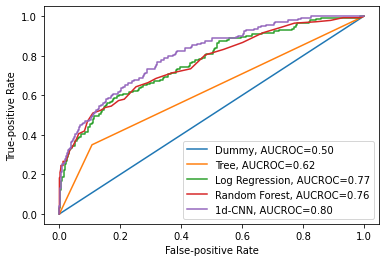

In [186]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, thresh = metrics.roc_curve(y_true, dummy_y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_true, dummy_y_pred_proba[:,1])
plt.plot(fpr,tpr,label=f"Dummy, AUCROC={auc:.2f}")

fpr, tpr, thresh = metrics.roc_curve(y_true, tree_y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_true, tree_y_pred_proba[:,1])
plt.plot(fpr,tpr,label=f"Tree, AUCROC={auc:.2f}")

fpr, tpr, thresh = metrics.roc_curve(y_true, log_y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_true, log_y_pred_proba[:,1])
plt.plot(fpr,tpr,label=f"Log Regression, AUCROC={auc:.2f}")

fpr, tpr, thresh = metrics.roc_curve(y_true, rfo_y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_true, rfo_y_pred_proba[:,1])
plt.plot(fpr,tpr,label=f"Random Forest, AUCROC={auc:.2f}")

fpr, tpr, thresh = metrics.roc_curve(y_true, probs[:,1])
auc = metrics.roc_auc_score(y_true, probs[:,1])
plt.plot(fpr,tpr,label=f"1d-CNN, AUCROC={auc:.2f}")

plt.ylabel("True-positive Rate")
plt.xlabel("False-positive Rate")

plt.legend(loc=0)

plt.savefig('results/'+bacterial_species+predicted_antibiotic+str(BATCH_SIZE)+'aucroc.png')